In [1]:
from PIL import Image as image 
from PIL import ImageFilter
from PIL import ImageOps as ops
import numpy as maths
import pandas as analytics
import os
import matplotlib.pyplot as graph
import warnings
warnings.filterwarnings("ignore")

# Functions and CONST_VARS

In [2]:
y_top = 5
x_right = 1088
x_left = 225
y_bottom = 955

In [3]:
def window(x,y,req_image,window_size = 5, colour = 0):
    """Window function """

    size = window_size//2

    x_left = x - size
    x_right = x + size + 1
    y_top = y - size
    y_bottom = y + size + 1 
    
    if x_left <= left : x_left = left
    if x_right >= right : x_right = right
    if y_top <= top : y_top = top
    if y_bottom >= bottom : y_bottom = bottom

    x_range = maths.arange(x_left,x_right,1)
    y_range = maths.arange(y_top,y_bottom,1)

    for row in x_range :
        for col in y_range:
            req_image.putpixel((row,col),colour)
    
    return req_image

def kernel(x,y):
    political_copy = political_imap.copy()
    a = maths.linspace(-1,1,4)
    x_range = [i+x for i in a]
    y_range = [i+y for i in a]
    l = []
    for px in x_range :
        for py in y_range :
            l.append(political_copy.getpixel((px,py)))
    l = maths.array(l)
            
    return l            

# Image Processing

In [4]:
os.getcwd()

'/home/ashirbad/GitHub/evolutionary_algo_gpu/codes'

In [5]:
path = "../data/pictures"
filename = "large-detailed-administrative-map-of-india-with-major-cities.jpg"
map_with_cities = image.open(os.path.join('..','data','pictures',filename), mode = 'r')

In [6]:
map_with_cities.size

(2176, 2690)

In [7]:
map_cities_gray = ops.grayscale(map_with_cities)
map_cities_gray.save(os.path.join(path,"map_cities_gray.png"))

In [8]:
map_states = image.open(os.path.join(path,"India-map-en.png"))
# map_states

In [9]:
map_states.size

(4965, 5623)

In [10]:
map_states_gray = ops.grayscale(map_states)

In [11]:
map_states_gray = map_states_gray.crop((left,top,right,bottom))
# map_states_gray

NameError: name 'left' is not defined

In [ ]:
min_lng = 68.7
max_lng = 97.25
min_lat = 8.4
max_lat = 37.6

In [ ]:
df_coordinates = analytics.read_csv("../data/documents/co-ordinates.csv")
df_coordinates

In [ ]:
df_coordinates.sort_values(by = 'lng')

In [ ]:
df_coordinates = df_coordinates[['city','lat','lng']]
df_coordinates.head()

In [ ]:
df_coordinates['test_lat'] = df_coordinates['lat']
df_coordinates['test_lng'] = df_coordinates['lng']

In [ ]:
# df_coordinates['test_lat'] = df_coordinates['test_lat'] - min_lat
# df_coordinates['test_lng'] = df_coordinates['test_lng'] - min_lng
# df_coordinates.head()

In [ ]:
df_test = df_coordinates[['city','test_lat','test_lng']]
df_test['lat'] = df_test['test_lat'].apply(lambda x:(round(x,2)))
df_test['lng'] = df_test['test_lng'].apply(lambda x:(round(x,2)))
df_test = df_test[['city','lat','lng']]
df_test = df_test.iloc[df_test[['lat','lng']].drop_duplicates().index.to_list()]
df_test.head()

In [ ]:
map_states_gray_copy = map_states_gray.copy()

In [ ]:
df_test = df_test.reset_index(drop = True)

In [ ]:
map_states_gray_copy = map_states_gray.copy()
for i in range(len(df_test)):
    lat_c = df_test.iloc[i]['lat']
    lng_c = df_test.iloc[i]['lng']
    lat_on_map = int((max_lat - lat_c)/(max_lat - min_lat) * map_states_gray.size[0])
    lng_on_map = int((lng_c - min_lng)/(max_lng - min_lng) * map_states_gray.size[1]) 
    
    window_size = 31
    colour = 0
    
    map_states_gray_copy = window(lat_on_map,lng_on_map,map_states_gray_copy,window_size,colour)
map_states_gray_copy

In [ ]:
assert False

In [ ]:
os.getcwd()

In [ ]:
map_cities = image.open("../data/pictures/india-cities-map.jpg")
map_cities

In [ ]:
map_cities_gray = ops.grayscale(map_cities)
map_cities_gray

In [ ]:
map_cities_gray = ops.grayscale(map_cities)
pixels = []
x , y = map_cities_gray.size

for row in range(x) :
    for col in range(y):
        colour = map_cities_gray.getpixel((row,col))
        if colour  == 0 :    pixels.append((row,col))
        if colour  >= 200 :
            map_cities_gray.putpixel((row,col),255)
map_cities_gray      

In [ ]:
pixels_matrix = maths.matrix(pixels)
pixels_matrix

In [ ]:
x = [float(a) for a in pixels_matrix[:,0]]
y = [float(a) for a in pixels_matrix[:,1]]


In [ ]:
map_cities_gray.size

In [ ]:
size = map_cities_gray.size
figure = graph.figure(figsize = (20,20))
graph.scatter(x,y)
# graph.legend()

In [ ]:
pixels_matrix

In [ ]:
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist

In [ ]:
y = pdist(pixels_matrix)

In [ ]:
Z = centroid(y)
Z

In [ ]:
l = 1
graph.scatter(range(len(fcluster(Z, l, criterion='distance'))),fcluster(Z, l, criterion='distance'))

In [ ]:
map_cities_copy.size

In [ ]:
map_cities_copy = map_cities_gray.copy()
for pixel in pixels:
    map_cities_copy.putpixel(pixel,255)
map_cities_copy

### Process this map and HURRAAHHH !!!!

In [ ]:
colored_map = image.open("../data/pictures/Tourist-Map-of-India.gif")
colored_map

In [ ]:
colored_map.data()

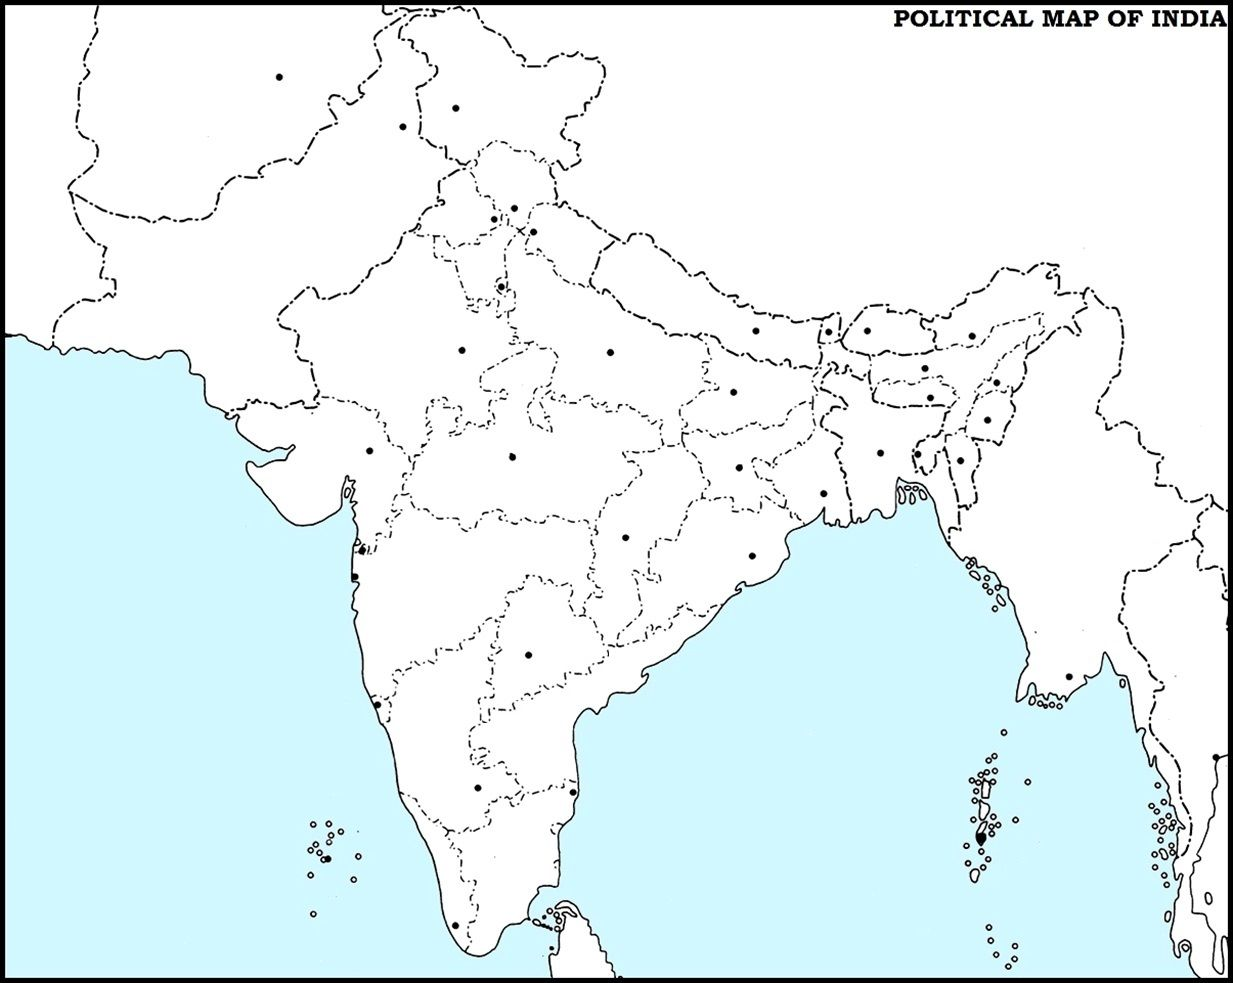

In [12]:
political_imap = image.open("../data/pictures/2df7da34eec4dae39226528b54afbbf6.jpg")
political_imap

In [13]:
political_imap = political_imap.convert(mode = 'L')
for x in range(political_imap.size[0]) :
    for y in range(political_imap.size[1]):
        if political_imap.getpixel((x,y)) > 50 : political_imap.putpixel((x,y),255)
        else : political_imap.putpixel((x,y),0)
box = (x_left, y_top, x_right, y_bottom)
political_imap = political_imap.crop(box = box) 

y_bottom_pol = 80
x_left_pol = 650

for x in range(x_left_pol,political_imap.size[0]):
    for y in range(y_bottom_pol):
        political_imap.putpixel((x,y),255)

# Pixel Value Extraction

In [14]:
pixels = []
political_copy = political_imap.copy()
for x in range(1,political_copy.size[0] - 2):
    for y in range(1,political_copy.size[1] - 2):
        if (kernel(x,y) == 0).all() : pixels.append((x,y))

In [15]:
points = []

for i in range(len(pixels)//9) :
    l = maths.matrix(pixels[i*9 + 0 : i*9 + 9])
    points.append((int(l[:,0].mean()),int(l[:,1].mean())))

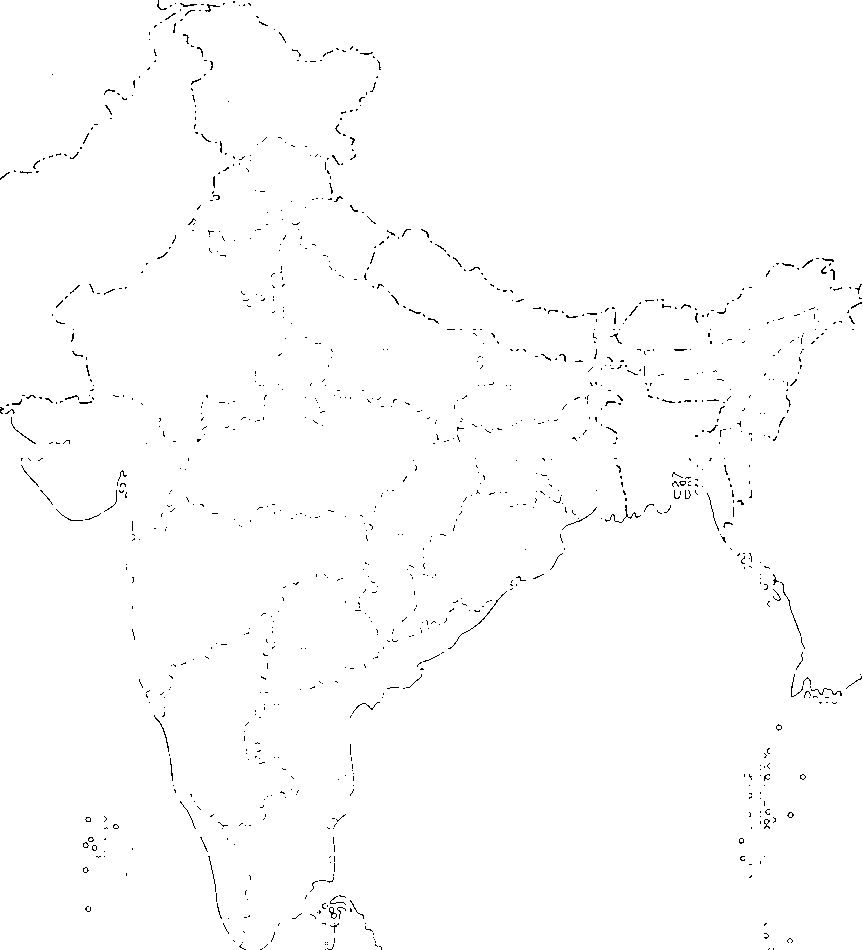

In [16]:
political_copy = political_imap.copy()
for point in pixels :
    for x in range(political_copy.size[0]) : political_copy.putpixel((x,point[1]),255)
    for y in range(political_copy.size[1]) : political_copy.putpixel((point[0],y),255)

political_copy.save('../data/pictures/final_map.jpg')
political_copy

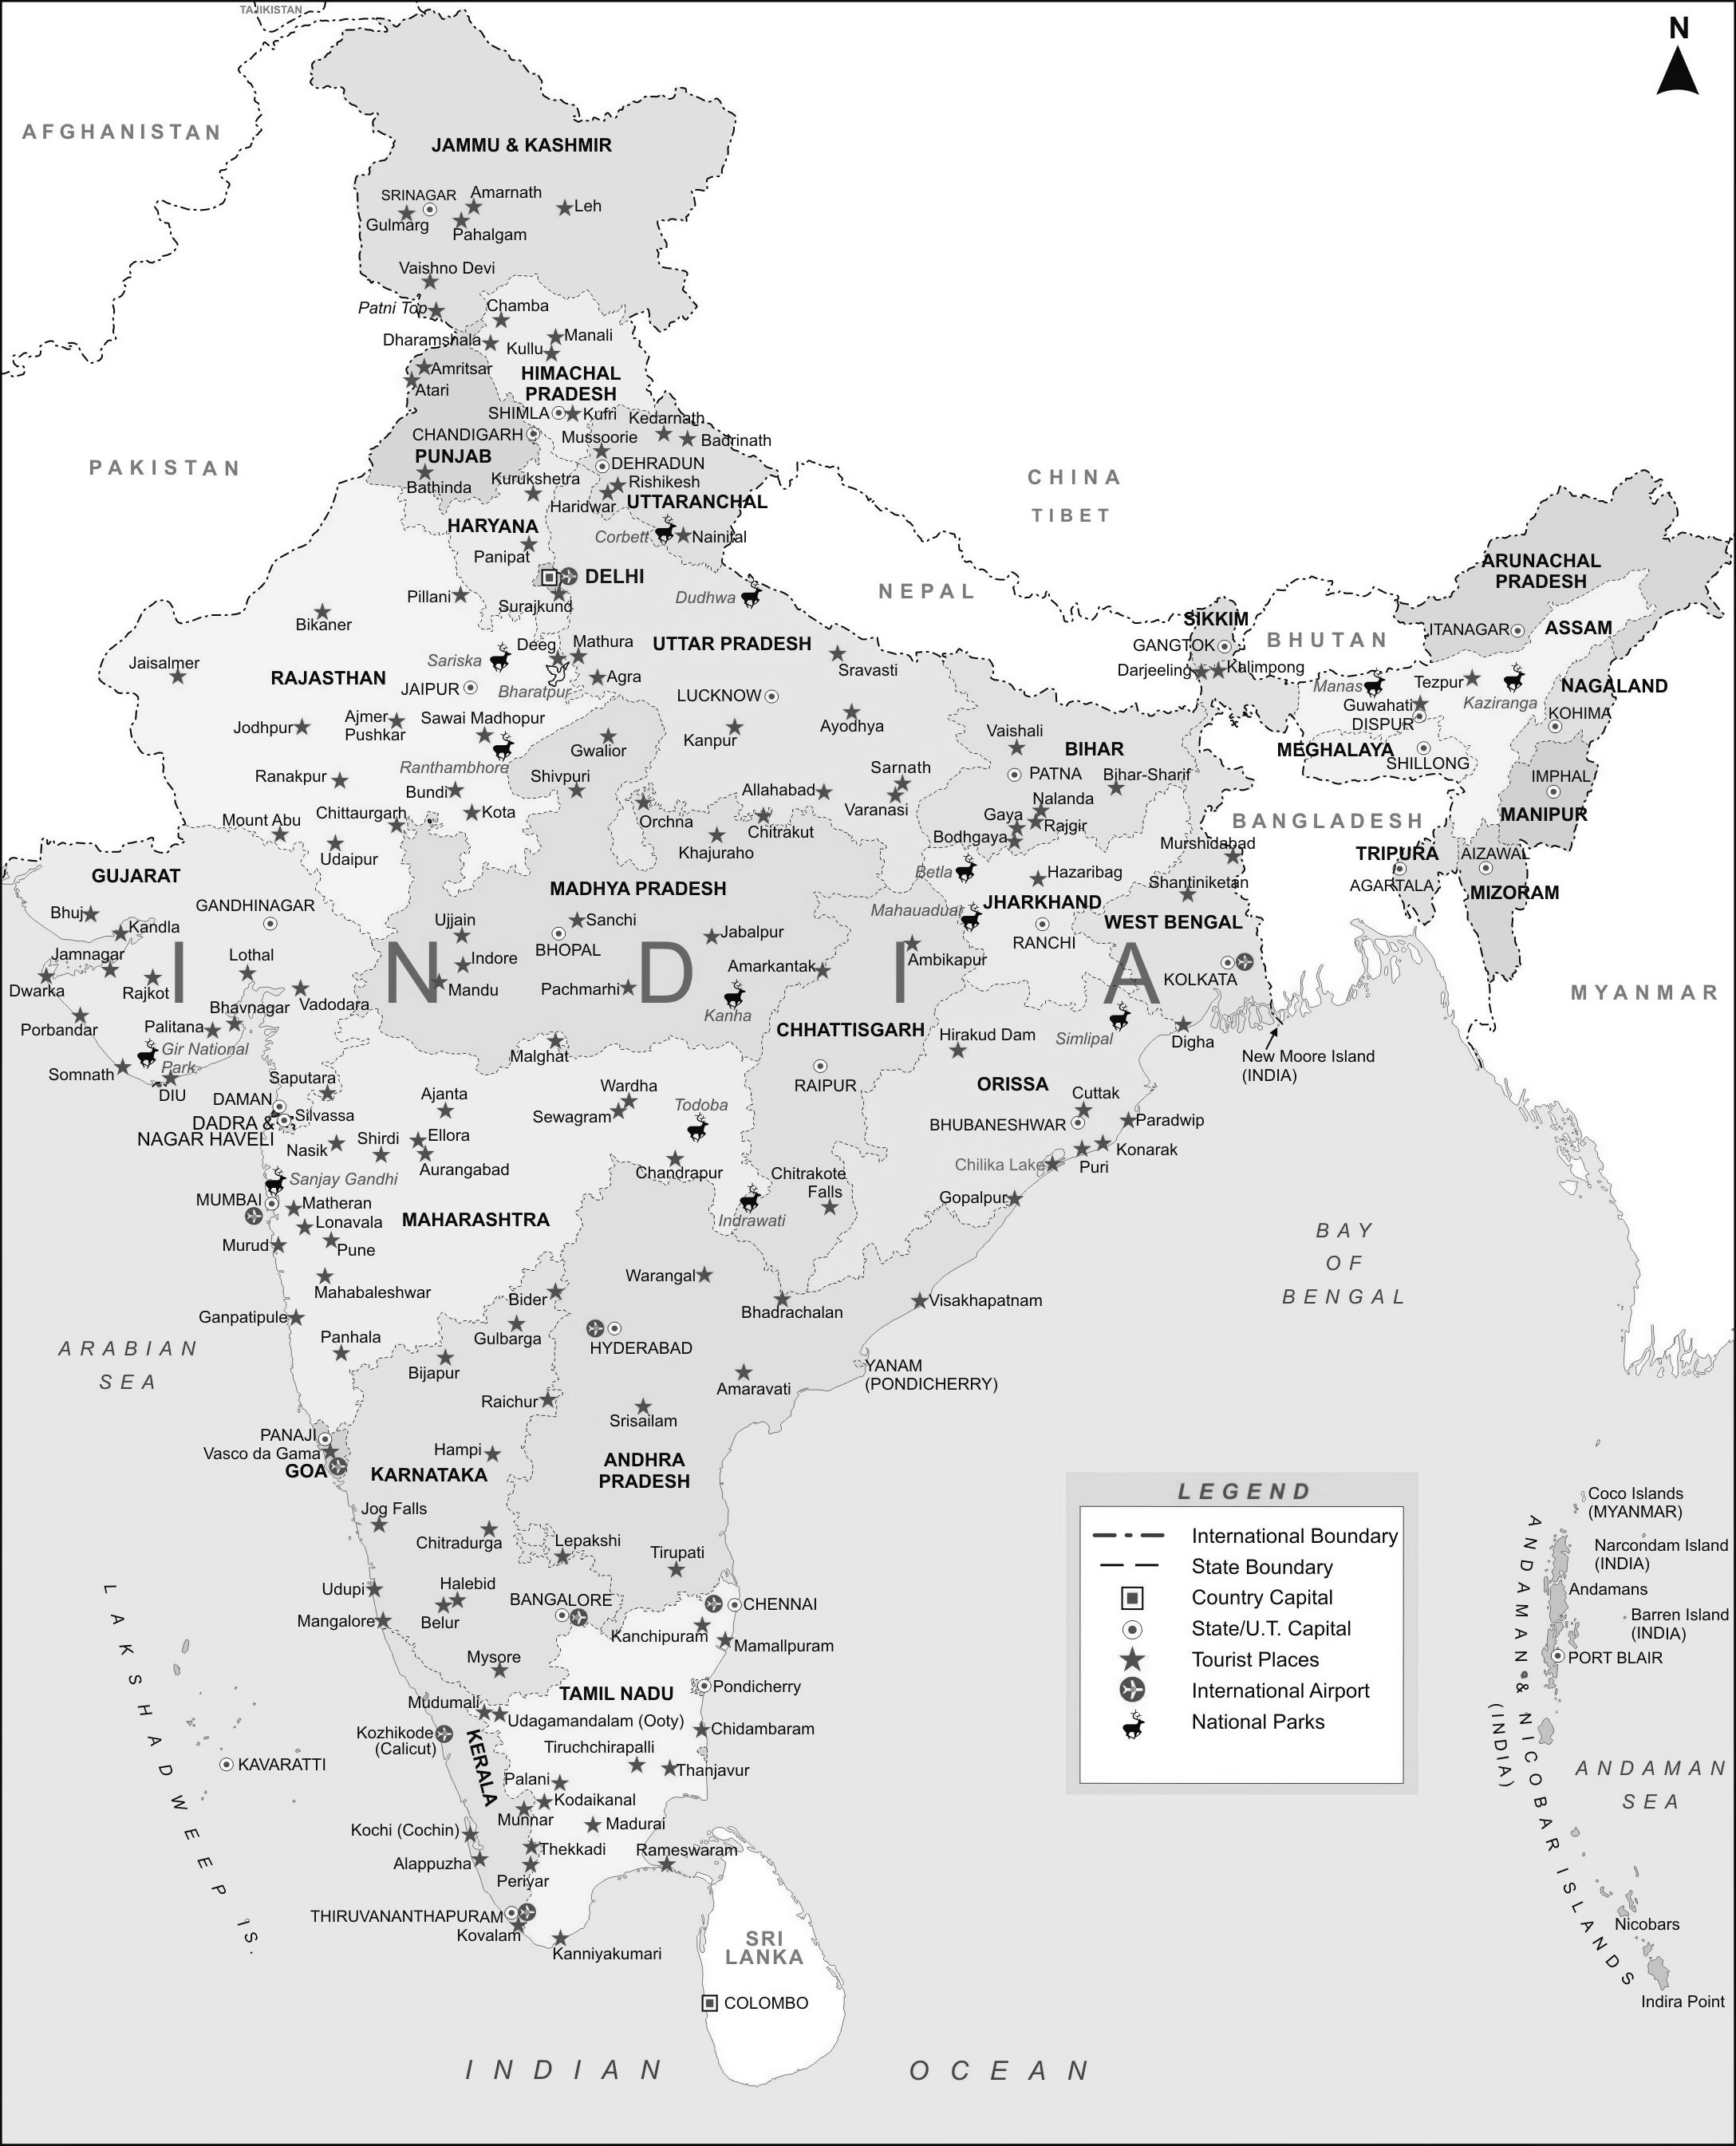

In [17]:
map_cities_gray

In [ ]:
interested_pixel_value = map_cities_gray.getpixel((708,263))

In [ ]:
pixels = []
for row in range((map_cities_gray.size[0])) :
    for col in range((map_cities_gray.size[1])):
        if map_cities_gray.getpixel((row,col)) == interested_pixel_value :
            pixels.append((row,col))
            map_cities_gray.putpixel((row,col),255)

In [18]:
pixels = maths.matrix(pixels)
x = [float(i) for i in pixels[:,0]]
y = [float(i) for i in pixels[:,1]]
analytics.DataFrame(data = {'x':x , 'y':y}).to_csv('../data/pixel_values.csv',index = False)

In [19]:
points = maths.matrix(points)
x = [float(i) for i in points[:,0]]
y = [float(i) for i in points[:,1]]
analytics.DataFrame(data = {'x':x , 'y':y}).to_csv('../data/points_values.csv',index = False)

In [ ]:
important_pixels = pixels.copy()

In [ ]:
map_cities_gray

In [ ]:
map_states_gray = ops.grayscale(map_states.resize(map_cities_gray.size))

In [ ]:
for pixel in pixels:
    map_states_gray.putpixel(pixel,0)
map_states_gray

In [ ]:
edge_detection = image.open(os.path.join(path,"edge_detection.png"))
edge_detection

In [ ]:
edge_detection = ops.grayscale(edge_detection)

In [ ]:
import numpy as maths

In [ ]:
edge_detection.size

In [ ]:
edge_detection_copy = edge_detection.copy()

In [ ]:
edge_detection = edge_detection_copy

In [ ]:
edge_pixels = []
col = 1315
for i in range(edge_detection.size[0]):
    edge_detection.putpixel((i,col),255)

edge_detection

In [ ]:
box = (0,0,1200,1315)
edge_detection = edge_detection.crop(box)

In [ ]:
edge_detection

In [ ]:
rains_image = image.open(os.path.join(path,"india_STATE CAPITALS_june 2015 rains.jpg"))
rains_image

In [ ]:
rains_image_gray = ops.grayscale(rains_image.getchannel("B"))
rains_image_gray

In [ ]:
rains_image_copy = rains_image_gray.copy()

In [ ]:
rains_image = rains_image_copy

In [ ]:
for row in range(rains_image_gray.size[0]):
    for col in range(rains_image_gray.size[1]):
        if rains_image_gray.getpixel((row,col)) < 110 :
            rains_image_gray.putpixel((row,col),0)
        elif rains_image_gray.getpixel((row,col)) > 120:
        
            rains_image_gray.putpixel((row,col),255)
rains_image_gray

In [ ]:
rains_image_gray_copy = rains_image_gray.copy()

In [ ]:
rains_image_gray.save("rains_image_gray.png")

In [ ]:
rains_image_gray

In [ ]:
rains_image_gray.size

In [ ]:
for row in range(649,rains_image_gray.size[0]):
    for col in range(0,279)    :
        rains_image_gray.putpixel((row,col),255)

rains_image_gray
    